In [1]:
from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_input.shape

(60000, 28, 28)

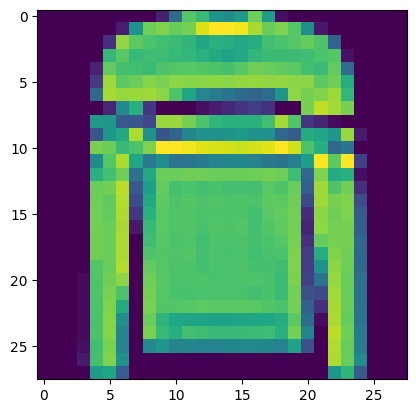

In [12]:
import matplotlib.pyplot as plt

plt.imshow(train_input[5])

In [15]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(scores)

{'fit_time': array([12.89173055, 12.62071991, 11.55865073, 11.5785799 ,  8.01057434]), 'score_time': array([0.04345536, 0.04520774, 0.04929948, 0.04570127, 0.04587746]), 'test_score': array([0.81283333, 0.80416667, 0.8335    , 0.82125   , 0.76883333])}


In [17]:
import tensorflow as tf

In [18]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [19]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model = keras.Sequential([dense])

In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7282 - loss: 0.8023
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8309 - loss: 0.4922
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8441 - loss: 0.4623
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8479 - loss: 0.4475
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8499 - loss: 0.4414


In [26]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8447 - loss: 0.4485


[0.4484492838382721, 0.843999981880188]